## HealthCare Analytics: Predicting the Length of Stay (LOS) of a patient
**Objective: Predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning.**

**The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.**

## Load Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode (connected = True)

In [12]:
import chart_studio as cs
import chart_studio.plotly as py
import chart_studio.tools as tls

In [13]:
username = "vivekmehendiratta"
api_key = "nQrS2n3v7shKKPTKws4O"

tls.set_credentials_file(username=username, api_key=api_key)

In [3]:
# train = pd.read_csv('Project_Sets/train_data.csv')
# test = pd.read_csv('Project_Sets/test_data.csv')
# dictionary = pd.read_csv('Project_Sets/train_data_dictionary.csv')
# sample = pd.read_csv('Project_Sets/sample_sub.csv')

In [4]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
dictionary = pd.read_csv('train_data_dictionary.csv')
sample = pd.read_csv('sample_sub.csv')

train["Stay"] = train["Stay"].replace("More than 100 Days", "Above 100")
train['Count']=1

train.drop(["case_id", "patientid", "City_Code_Patient"], axis = 1, inplace = True)
test.drop(["case_id", "patientid", "City_Code_Patient"], axis = 1, inplace = True)

train.shape, test.shape

((318438, 16), (137057, 14))

### Average visitors in relation to length of stay.-- EXHIBIT 3

In [15]:
visitor_mean = train.groupby("Stay", as_index=False).agg(mean_visitors = ("Visitors with Patient", "mean"))

In [17]:
fig3 = px.bar(visitor_mean, x='Stay', y='mean_visitors', labels={
    'Stay':'Length of Stay (Days)',
    'mean_visitors':'Visitors'
})
fig3.update_xaxes(showgrid = False)
fig3.update_yaxes(showgrid=False)
fig3.update_layout(paper_bgcolor='#F8F4F4', plot_bgcolor='#F8F4F4')
fig3.update_layout(title="Average Visitors in relation to Length of Stay (Days)",title_x=0.5)
fig3.show()

py.plot(fig3, filename = "Average Visitors in relation to Length of Stay",  auto_open = False)

'https://plotly.com/~vivekmehendiratta/28/'

In [ ]:
visitor_mean = train.groupby("Stay")["Visitors with Patient"].agg(["mean"]).plot(kind = "bar", color = "deepskyblue", legend = None)
visitor_mean.set_title("Average Visitors in relation to Length of Stay")
visitor_mean.set_xlabel("Length of Stay")
visitor_mean.set_ylabel("Visitors")
visitor_mean.set_xticklabels(visitor_mean.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, '0-10'),
 Text(1, 0, '11-20'),
 Text(2, 0, '21-30'),
 Text(3, 0, '31-40'),
 Text(4, 0, '41-50'),
 Text(5, 0, '51-60'),
 Text(6, 0, '61-70'),
 Text(7, 0, '71-80'),
 Text(8, 0, '81-90'),
 Text(9, 0, '91-100'),
 Text(10, 0, 'Above 100')]

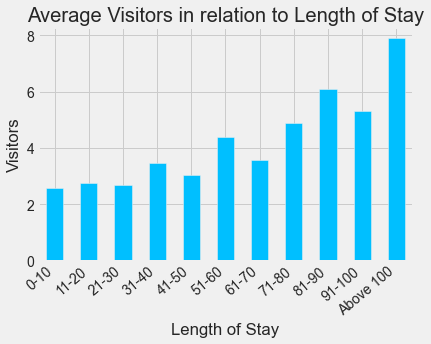

In [5]:
visitor_mean = train.groupby("Stay")["Visitors with Patient"].agg(["mean"]).plot(kind = "bar", color = "deepskyblue", legend = None)
visitor_mean.set_title("Average Visitors in relation to Length of Stay")
visitor_mean.set_xlabel("Length of Stay")
visitor_mean.set_ylabel("Visitors")
visitor_mean.set_xticklabels(visitor_mean.get_xticklabels(), rotation=40, ha="right")

## 2. Data Processing & Feature engineering

In [6]:
train = train.drop(['Hospital_region_code', 'patientid', 'City_Code_Patient'], axis = 1)
test = test.drop(['Hospital_region_code', 'patientid', 'City_Code_Patient'], axis = 1)

KeyError: "['patientid' 'City_Code_Patient'] not found in axis"

In [ ]:
# Combine test and train dataset for processing
combined = [train, test]

**2a&b Encoding categorical features & binning**

In [ ]:
from sklearn.preprocessing import LabelEncoder

for dataset in combined:
    label = LabelEncoder()
    dataset['Department'] = label.fit_transform(dataset['Department'])

In [ ]:
combined[1].Department.unique()

In [ ]:
# Ward type
for dataset in combined:
    label = LabelEncoder()
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [ ]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [ ]:
for dataset in combined:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

In [ ]:
combined[0].Stay.unique()

In [ ]:
stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}

In [ ]:
combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

**2c Scaling numerical data**

In [ ]:
columns_list = ['Type of Admission', 'Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']

In [ ]:
len(columns_list)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

for dataset in combined:
    dataset[columns_list]= ss.fit_transform(dataset[columns_list].values)

## Data Modelling

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
train = combined[0]
test = combined[1]

In [ ]:
sample

In [ ]:
X_train = train.drop(['case_id', 'Stay'], axis=1)
Y_train = train["Stay"]
X_test  = test.drop("case_id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

In [ ]:
sample.shape

In [ ]:
X_test.columns

In [ ]:
X_test.isna().sum()

In [ ]:
Y_train

### Logistic Regression Feature Importance -- EXHIBIT 9

In [ ]:
# Logistic Regression

#define model
log_reg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1200000)

# fit the model
log_reg.fit(X_train, Y_train)

#predicted values for test set
Y_pred = log_reg.predict(X_test)

#accuracy for logistic regression
acc_log_reg = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log_reg

In [ ]:
# get importance
feature_importance = log_reg.coef_[0]

#summarize important features
print("Top 5 Important Features for Logistic Regression\n")
print("Attribute".center(35),"Importance".center(35), sep = "\t")
print("--------------------".center(35),"--------------------".center(35), sep = "\t")
for importance, name in sorted(zip(abs(log_reg.coef_[0]), X_train.columns),reverse=True)[:5]:
    print (name.center(35), format(importance,'.2f').center(35), sep = "\t")
# plot feature importance
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_reg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False) 

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances (coefficients)', size=20)
plt.xticks(rotation=40, ha = "right", fontsize = 8)
plt.show()

### Decision Tree Feature Importance -- EXHIBIT 10

In [ ]:
# Decision Tree

#define model
decision_tree = DecisionTreeClassifier()

#fit model
decision_tree.fit(X_train, Y_train)

#predicted values for test set
Y_pred = decision_tree.predict(X_test)

#get accuracy
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

In [ ]:
# get importance
feature_importance = decision_tree.feature_importances_

# summarize feature importance
print("Top 5 Important Features for Decision Tree\n")
print("Attribute".center(35),"Importance".center(35), sep = "\t")
print("--------------------".center(35),"--------------------".center(35), sep = "\t")
for importance, name in sorted(zip(decision_tree.feature_importances_, X_train.columns),reverse=True)[:5]:
    print (name.center(35), format(importance,'.2f').center(35), sep = "\t")
    
# plot feature importance
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': decision_tree.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False) 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation=40, ha = "right", fontsize = 8)
plt.show()

### Random Forest Feature Importance -- EXHIBIT 11

In [ ]:
# Random Forest

#define model
random_forest = RandomForestClassifier(n_estimators=100)

#fit model
random_forest.fit(X_train, Y_train)

#predicted values for test set
Y_pred = random_forest.predict(X_test)

#get accuracy
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

In [ ]:
# get importance
feature_importance = random_forest.feature_importances_

# summarize feature importance
print("Top 5 Important Features for Random Forest\n")
print("Attribute".center(35),"Importance".center(35), sep = "\t")
print("--------------------".center(35),"--------------------".center(35), sep = "\t")
for importance, name in sorted(zip(random_forest.feature_importances_, X_train.columns),reverse=True)[:5]:
    print (name.center(35), format(importance,'.2f').center(35), sep = "\t")
    
# plot feature importance
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': random_forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False) 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation=40, ha = "right", fontsize = 8)
plt.show()

### Training Set Accuracy by model -- EXHIBIT 12

In [ ]:
sns.barplot(x= ['LOG','KNN','DT','RF'],y= [acc_log_reg, acc_knn, acc_decision_tree,acc_random_forest])